11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9269
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1131 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0775 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0577 - accuracy: 0.9822
Epoch 5/5
313/313 [==============================] - 0s 963us/step - loss: 0.0703 - accuracy: 0.9793
Verlust:  0.07032065838575363 Genauigkeit:  0.9793000221252441


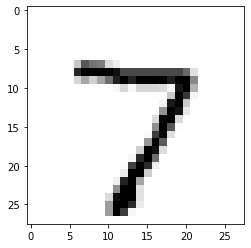

gesuchte Zahl:  7
 Zahl: 0   Erkennungsrate: 0.0
 Zahl: 1   Erkennungsrate: 0.0
 Zahl: 2   Erkennungsrate: 0.0
 Zahl: 3   Erkennungsrate: 0.0001
 Zahl: 4   Erkennungsrate: 0.0
 Zahl: 5   Erkennungsrate: 0.0
 Zahl: 6   Erkennungsrate: 0.0
 Zahl: 7   Erkennungsrate: 0.9998
 Zahl: 8   Erkennungsrate: 0.0
 Zahl: 9   Erkennungsrate: 0.0


In [4]:
import tensorflow as tf
import numpy
import matplotlib

# 1. Daten aufbereiten
mnist = tf.keras.datasets.mnist
   
(trainZiffernBilder, trainZiffernLabels),(testZiffernBilder, testZiffernLabels) = mnist.load_data() 
trainZiffernBilder = trainZiffernBilder / 255.0
testZiffernBilder = testZiffernBilder / 255.0

# 2. Model erstellen
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
     
model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
# 3. Model trainieren
model.fit(trainZiffernBilder, trainZiffernLabels, epochs=5)
    
# 4. Model prüfen
verlust, genauigkeit = model.evaluate(testZiffernBilder, testZiffernLabels)
print('Verlust: ', verlust, 'Genauigkeit: ', genauigkeit)
     
# 5. Testen des neuronalen Netzwerkes mit Testdaten
gesuchteZahlIndex = 0
erkennungsRaten = model.predict (testZiffernBilder [gesuchteZahlIndex:gesuchteZahlIndex+1])
flattendEr = erkennungsRaten.flatten()
flattendTZLabels = testZiffernLabels.flatten()
    
# 6. Test Ausgabe der gesuchten Zahl als Bild
imageArray = numpy.asfarray (testZiffernBilder [gesuchteZahlIndex:gesuchteZahlIndex+1]).reshape((28,28))
matplotlib.pyplot.imshow(imageArray, cmap='Greys',interpolation='None')
matplotlib.pyplot.show()
print ("gesuchte Zahl: ", flattendTZLabels[gesuchteZahlIndex])
    
# Ausgabe der Erkennungsraten für die Zahlen 0..9
counter = 0
while counter < 10:
  readAbleErkennung = flattendEr[counter] * 10000
  readAbleErkennung = readAbleErkennung.astype(int)
  readAbleErkennung = readAbleErkennung / 10000
  print (" Zahl:", counter, "  Erkennungsrate:", readAbleErkennung)
  counter = counter + 1